In [1]:
!pip install mnist

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import Lambda, Dense, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical

import tensorflow as tf

import mnist

# Loading the ResNet50 Pre-trained layers and adding the ouput layer

In [3]:
resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

In [5]:
for layer in resnet.layers:
  layer.trainable = False

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

In [20]:
from keras.models import Model

model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

# Loading and preprocessing the MNIST Data

In [11]:
# Loading the mnist data
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [13]:
print(f"Train Images Shape: {train_images.shape} and Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape} and Test Labels Shape: {test_labels.shape}")

Train Images Shape: (60000, 28, 28) and Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28) and Test Labels Shape: (10000,)


In [14]:
import cv2

dim = (32, 32)

# Resizing the image to 32x32 from 28x28
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

def convert_dim(images):
  rgb_list = []

  # Creating an array with the manipulated images
  for i in range(len(images)):  rgb_list.append(to_rgb(images[i]))

      
  # Final Images to the model.
  return np.squeeze(np.stack([rgb_list],axis=4), axis=4)

train_images = convert_dim(train_images)
test_images = convert_dim(test_images)

# Converting the labels to categorical values.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("After altering the Images and labels")
print(f"Train Images Shape: {train_images.shape} and Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape} and Test Labels Shape: {test_labels.shape}")

After altering the Images and labels
Train Images Shape: (60000, 32, 32, 3) and Train Labels Shape: (60000, 10)
Test Images Shape: (10000, 32, 32, 3) and Test Labels Shape: (10000, 10)


# Training and Evaluating the Model

In [21]:
# Model compiling
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [22]:
hist = model.fit(
    train_images,
    train_labels,
    epochs = 5,
    verbose = 1,
    batch_size = 64,
    shuffle = True
)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0962 - accuracy: 0.9684
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0934 - accuracy: 0.9688
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0899 - accuracy: 0.9697
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0848 - accuracy: 0.9722
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0815 - accuracy: 0.9730


In [23]:
model.evaluate(
    test_images,
    test_labels
)

313/313 [==============================] - 5s 16ms/step - loss: 0.1372 - accuracy: 0.9608


[0.13715830445289612, 0.9607999920845032]

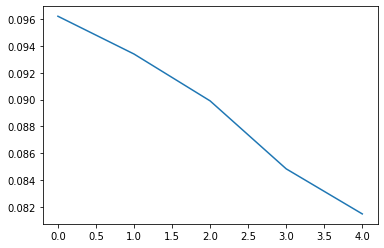

In [34]:
# Loss of the model

plt.plot(hist.history["loss"], label="Train Loss")

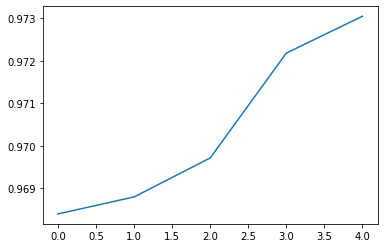

In [35]:
# Accuracy of the Model

plt.plot(hist.history["accuracy"])